In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [14]:
data = pd.read_csv("/content/sewer_network.csv")
data.head()

,Pipe \nLabel,U/S\nNode,D/S\nNode,Ground level (U/s) (m),Ground level (D/s) (m),Invert (U/S) (m),Invert (D/s) (m),Length (m),Diameter (mm),Slope \n(1 in ),...,Capacity \n(Full Flow) (L/s),Velocity at Full Flow (m/s),Drop Provided (m),Pipe material,Manning's n,Infiltration (Cumulative) (lps),Depth of Sewer in U/S (m),Depth of Sewer in D/S (m),Avg Depth of Sewer (m),Remark
0,P-00001,M-00001,M-13952,198.37,198.37,197.17,196.98,18.8,200,95,...,43.75,1.4,NaN,DWC/ PE100,0.01,0.03,1.20,1.39,1.30,NaN
1,P-00002,M-00002,M-00003,199.72,199.67,198.52,198.32,18.5,200,90,...,44.94,1.4,NaN,DWC/ PE100,0.01,0.05,1.20,1.35,1.27,NaN
2,P-00003,M-00003,M-00004,199.67,199.61,198.32,198.22,16.2,200,160,...,33.71,1.1,NaN,DWC/ PE100,0.01,0.08,1.35,1.39,1.37,NaN
3,P-00004,M-00004,M-00005,199.61,199.56,198.22,198.14,16.2,200,220,...,28.75,0.9,NaN,DWC/ PE100,0.01,0.10,1.39,1.42,1.41,NaN
4,P-00005,M-00005,M-00006,199.56,199.46,198.14,198.05,22.1,200,250,...,26.97,0.9,NaN,DWC/ PE100,0.01,0.12,1.42,1.41,1.42,NaN


In [19]:
data.shape
data.dtypes

Pipe \nLabel                        object
U/S\nNode                           object
D/S\nNode                           object
Ground level (U/s) (m)             float64
Ground level (D/s) (m)             float64
Invert (U/S) (m)                   float64
Invert (D/s) (m)                   float64
Length (m)                         float64
Diameter (mm)                        int64
Slope \n(1 in  )                    object
Ulimate Population Incremental       int64
Ultimate Population cumulative      object
Ulimate Peak Flow (L/s)            float64
Velocity Actual (m/s)              float64
q/Q                                float64
d/D                                float64
Capacity \n(Full Flow) (L/s)       float64
Velocity at Full Flow (m/s)        float64
Drop Provided (m)                  float64
Pipe material                       object
Manning's n                        float64
Infiltration (Cumulative) (lps)    float64
Depth of Sewer in U/S (m)          float64
Depth of Se

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipe 
Label                      14080 non-null  object 
 1   U/S
Node                         14080 non-null  object 
 2   D/S
Node                         14080 non-null  object 
 3   Ground level (U/s) (m)           14080 non-null  float64
 4   Ground level (D/s) (m)           14080 non-null  float64
 5   Invert (U/S) (m)                 14080 non-null  float64
 6   Invert (D/s) (m)                 14080 non-null  float64
 7   Length (m)                       14080 non-null  float64
 8   Diameter (mm)                    14080 non-null  int64  
 9   Slope 
(1 in  )                  14080 non-null  object 
 10  Ulimate Population Incremental   14080 non-null  int64  
 11  Ultimate Population cumulative   14080 non-null  object 
 12  Ulimate Peak Flow 

In [23]:
data['Ultimate Population cumulative'] = pd.to_numeric(data['Ultimate Population cumulative'],errors = 'coerce') # it should be change in int64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipe 
Label                      14080 non-null  object 
 1   U/S
Node                         14080 non-null  object 
 2   D/S
Node                         14080 non-null  object 
 3   Ground level (U/s) (m)           14080 non-null  float64
 4   Ground level (D/s) (m)           14080 non-null  float64
 5   Invert (U/S) (m)                 14080 non-null  float64
 6   Invert (D/s) (m)                 14080 non-null  float64
 7   Length (m)                       14080 non-null  float64
 8   Diameter (mm)                    14080 non-null  int64  
 9   Slope 
(1 in  )                  14080 non-null  object 
 10  Ulimate Population Incremental   14080 non-null  int64  
 11  Ultimate Population cumulative   13996 non-null  float64
 12  Ulimate Peak Flow 

In [24]:
data['Pipe material'] = data['Pipe material'].astype('category') # it should be in astype in category value

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Pipe 
Label                      14080 non-null  object  
 1   U/S
Node                         14080 non-null  object  
 2   D/S
Node                         14080 non-null  object  
 3   Ground level (U/s) (m)           14080 non-null  float64 
 4   Ground level (D/s) (m)           14080 non-null  float64 
 5   Invert (U/S) (m)                 14080 non-null  float64 
 6   Invert (D/s) (m)                 14080 non-null  float64 
 7   Length (m)                       14080 non-null  float64 
 8   Diameter (mm)                    14080 non-null  int64   
 9   Slope 
(1 in  )                  14080 non-null  object  
 10  Ulimate Population Incremental   14080 non-null  int64   
 11  Ultimate Population cumulative   13996 non-null  float64 
 12  Ulim

In [27]:
data[data.duplicated()].shape

(3, 26)

In [29]:
data[data.duplicated()]

,Pipe \nLabel,U/S\nNode,D/S\nNode,Ground level (U/s) (m),Ground level (D/s) (m),Invert (U/S) (m),Invert (D/s) (m),Length (m),Diameter (mm),Slope \n(1 in ),...,Capacity \n(Full Flow) (L/s),Velocity at Full Flow (m/s),Drop Provided (m),Pipe material,Manning's n,Infiltration (Cumulative) (lps),Depth of Sewer in U/S (m),Depth of Sewer in D/S (m),Avg Depth of Sewer (m),Remark
14077,P-00005,M-00005,M-00006,199.56,199.46,198.14,198.05,22.1,200,250,...,26.97,0.9,NaN,DWC/ PE100,0.01,0.12,1.42,1.41,1.42,NaN
14078,P-00171,M-00171,M-00172,204.51,204.67,203.31,203.20,27.4,200,250,...,26.97,0.9,NaN,DWC/ PE100,0.01,0.20,1.20,1.47,1.33,NaN
14079,P-09341,M-09341,M-09342,201.68,200.08,199.27,198.88,23.8,200,60,...,55.05,1.7,NaN,DWC/ PE100,0.01,0.30,2.41,1.20,1.81,NaN


In [31]:
data1 = data.drop_duplicates()

In [34]:
data1.shape

(14077, 26)

In [35]:
data = data1.copy()

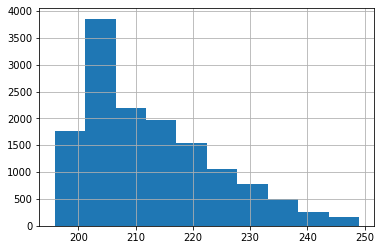

In [42]:
data['Ground level (D/s) (m)'].hist()

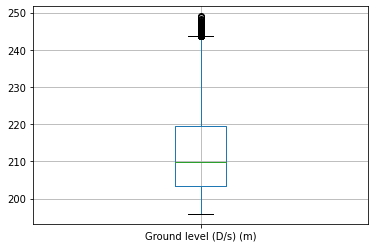

In [41]:
data.boxplot(column=['Ground level (D/s) (m)'])